# Election Data Project - Polls and Donors
In this Data Project we will be looking at data from the 2012 election.

In this project we will analyze two datasets. The first data set will be the results of political polls. We will analyze this aggregated poll data and answer some questions:

1.) Who was being polled and what was their party affiliation?
2.) Did the poll results favor Romney or Obama?
3.) How do undecided voters effect the poll?
4.) Can we account for the undecided voters?
5.) How did voter sentiment change over time?
6.) Can we see an effect in the polls from the debates?

In [4]:
# for data
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

from __future__ import division

# The data for the polls will be obtained from HuffPost Pollster. You can check their website here. There are some pretty awesome politcal data stes to play with there so I encourage you to go and mess around with it yourself after completing this project.

We're going to use the requests module to import some data from the web. For more information on requests, check out the documentation here.

We will also be using StringIO to work with csv data we get from HuffPost. StringIO provides a convenient means of working with text in memory using the file API, find out more about it here



# notebook or url or website for election project: http://nbviewer.jupyter.org/github/jmportilla/Udemy-notes/blob/master/Data%20Project%20-%20Election%20Analysis.ipynb

In [5]:
# grab data from web (HTTP capabilities)

import requests

#we'll also use StringIO to work with the csv file, the dataframe will require a .read method
from io import StringIO

In [6]:
# this is the url link for th poll data in csv form

url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

# request to get info from this url in csv form; and since it's a csv, i use the text method to get text from it
source = requests.get(url).text

poll_data = StringIO(source) # this is to avoid a string IO error with pandas
#stringIO read and write this source of information as a file bc read_csv need document in file format

In [7]:
poll_df = pd.read_csv(poll_data)

In [8]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 17 columns):
Pollster                  590 non-null object
Start Date                590 non-null object
End Date                  590 non-null object
Entry Date/Time (ET)      590 non-null object
Number of Observations    568 non-null float64
Population                590 non-null object
Mode                      590 non-null object
Obama                     590 non-null float64
Romney                    590 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              590 non-null object
Source URL                588 non-null object
Partisan                  590 non-null object
Affiliation               590 non-null object
Question Text             0 non-null float64
Question Iteration        590 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 78.4+ KB


In [9]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


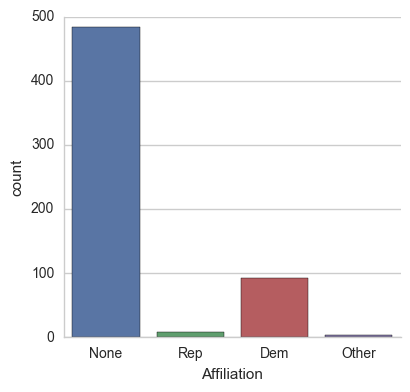

In [10]:
sns.factorplot("Affiliation", data=poll_df,kind="count")
# most of the poll have no affiliation
# more poll affiliate with democratic than republican 

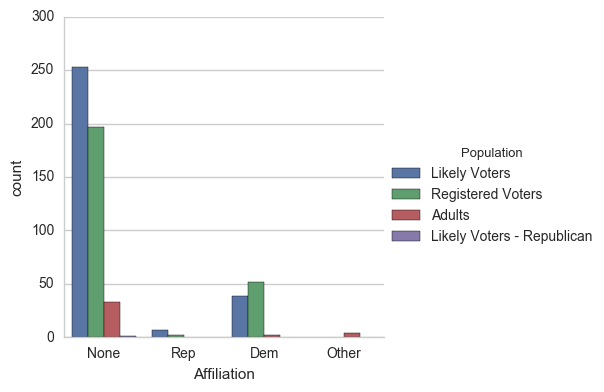

In [11]:
sns.factorplot("Affiliation", data=poll_df, hue="Population", kind="count")

# most are likely voters and registered votors

In [12]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [13]:
# look at the average for all category who are undecided

avg = pd.DataFrame(poll_df.mean())
# make avg by taking the average of the dataframe

avg

,0
Number of Observations,1295.390845
Obama,46.774576
Romney,44.572881
Undecided,6.546099
Other,3.400990
Question Text,NaN
Question Iteration,1.000000


In [14]:
avg = pd.DataFrame(poll_df.mean())

avg.drop("Number of Observations",axis=0, inplace=True)
# drop column of "Number of Observations"

avg.drop("Question Text",axis=0, inplace=True)
avg.drop("Question Iteration",axis=0, inplace=True)


avg
 

,0
Obama,46.774576
Romney,44.572881
Undecided,6.546099
Other,3.400990


In [15]:
std = pd.DataFrame(poll_df.std())
std.drop("Number of Observations", axis=0, inplace=True)

std.drop("Question Text",axis=0, inplace=True)
std.drop("Question Iteration",axis=0, inplace=True)


std

,0
Obama,2.447069
Romney,2.925320
Undecided,3.698614
Other,2.721318


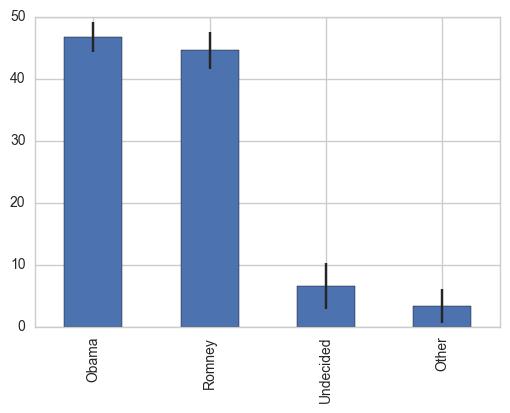

In [16]:
avg.plot(yerr=std, kind="bar", legend=False)

# yerr means y-error
# this is plotting the average poll of candidates in their y-error
# the blue bars are the average, the black lines are standard deviation

In [17]:
poll_avg = pd.concat([avg,std], axis=1)

# axis=1 means concatenate in column methods

In [18]:
poll_avg
#first column is average
# 2nd column is std

,0,0
Obama,46.774576,2.447069
Romney,44.572881,2.925320
Undecided,6.546099,3.698614
Other,3.400990,2.721318


In [19]:
poll_avg.columns=["Average", "STD"]

In [20]:
poll_avg

,Average,STD
Obama,46.774576,2.447069
Romney,44.572881,2.925320
Undecided,6.546099,3.698614
Other,3.400990,2.721318


Looks like the polls indicate it as a fairly close race, but what about the undecided voters? Most of them will likely vote for one of the candidates once the election occurs. If we assume we split the undecided evenly between the two candidates the observed difference should be an unbiased estimate of the final difference.

In [21]:
#take a look at the dataframe again

poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


If we wanted to, we could also do a quick (and messy) time series analysis of the voter sentiment by plotting Obama/Romney favor versus the Poll End Dates. Let's take a look at how we could quickly do tht in pandas.

Note: The time is in reverse chronological order. Also keep in mind the multiple polls per end date.


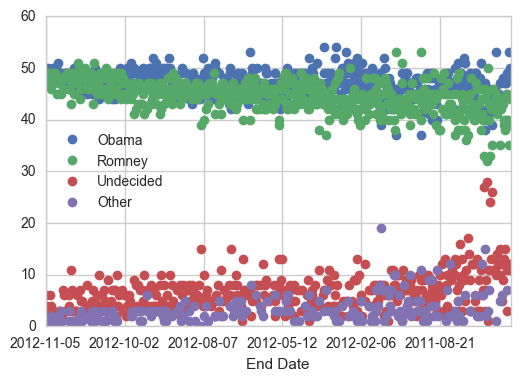

In [22]:
poll_df.plot(x="End Date", y=["Obama", "Romney", "Undecided","Other"], linestyle="", marker="o")

From the right to left, the undecided polls is going down bc they have chosen a candidate to vote as end date approach;
Both Obama and Romney's poll are getting closer as approaching the end of the end date

get a better visualization, need to edit dataframe

In [23]:
from datetime import datetime

Now we'll define a new column in our poll_df DataFrame to take into account the difference between Romney and Obama in the polls.

In [24]:
#create a new column for difference between them in percentage 

poll_df["Difference"] = (poll_df.Obama - poll_df.Romney)/100

#preview the new column
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


Great! Keep in mind that the Difference column is Obama minus Romney, thus a positive difference indicates a leaning towards Obama in the polls.

Now let's go ahead and see if we can visualize how this sentiment in difference changes over time. We will start by using groupby to group the polls by their start data and then sorting it by that Start Date.

In [25]:
# set as index=False to keep the 0,1,2,... index. Then we'll take the mean of the poll on that day
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()

poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


Great! Now plotting the Differencce versus time should be straight forward.

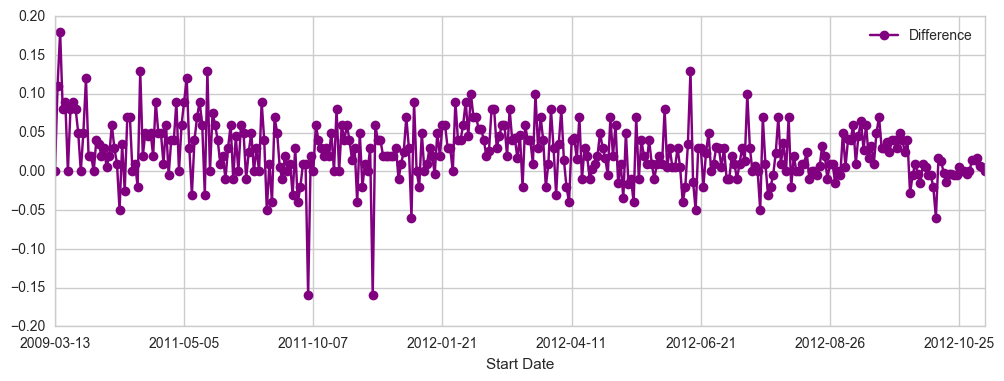

In [26]:
# plotting the difference in polls between Obama and Romney 
fig = poll_df.plot("Start Date", "Difference", figsize=(12,4), marker="o",linestyle="-",color="purple")

# most of the markers are above zero, which means Obama are in the lead in most of the time. 
# Romney are in the lead in October 7th. Something must have happned

It would be very interesting to plot marker lines on the dates of the debates and see if there is any general insight to the poll results.

The debate dates were Oct 3rd, Oct 11, and Oct 22nd. Let's plot some lines as markers and then zoom in on the month of October.

In order to find where to set the x limits for the figure we need to find out where the index for the month of October in 2012 is. Here's a simple for loop to find that row. Note, the string format of the date makes this difficult to do without using a lambda expression or a map.


In [27]:
# set row count and xlimit list

row_in = 0
xlimit = []

#Cycle through dates until 2012-10 is found, then print row index
for date in poll_df["Start Date"]:
    if date[0:7] == "2012-10": #if the first seven items of the date equal to 2012-10
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in +=1
        
print (min(xlimit))
print (max(xlimit))

329
356


Great now we know where to set our x limits for the month of October in our figure.


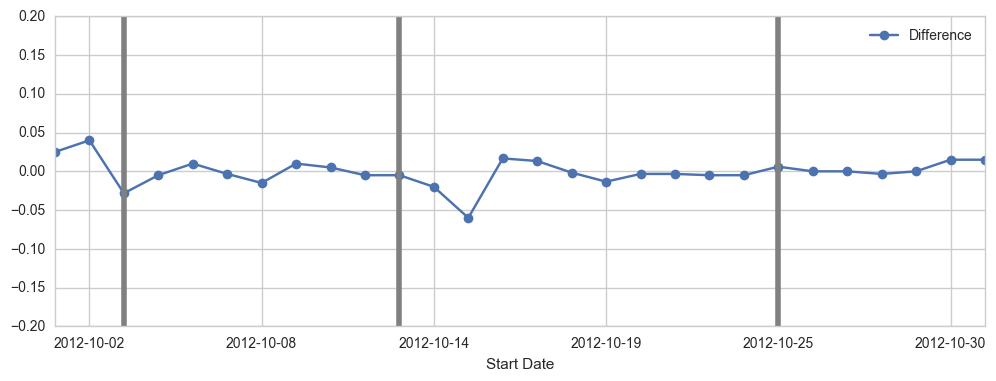

In [28]:
#start with originial figure 
fig = poll_df.plot("Start Date", "Difference", figsize=(12,4), marker="o", linestyle="-",xlim=(329,356))

#now add the debate markers
plt.axvline(x=329+2, linewidth=4, color="grey")
plt.axvline(x=329+10, linewidth=4, color="grey")
plt.axvline(x=329+21, linewidth=4, color="grey")

Surprisingly, thse polls reflect a dip for Obama after the second debate against Romney, even though memory serves that he performed much worse against Romney during the first debate.

For all these polls it is important to remeber how geographical location can effect the value of a poll in predicting the outcomes of a national election.

# Donor Data Set

Let's go ahead and switch gears and take a look at a data set consisting of information on donations to the federal campaign.

This is going to be the biggest data set we've looked at so far. You can download it here , then make sure to save it to the same folder your iPython Notebooks are in.

In [29]:
#set the dataframe as csv file

donor_df = pd.read_csv("/Users/sonya/udemy-data-visualization/Data/Election_Donor_Data.csv")

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
#bet a quick overview
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [31]:
#let's also just take a glimpse
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


What might be interesting to do is get a quick glimpse of the donation amounts, and the average donation amount. Let's go ahead and break down the data.

In [32]:
# get a quick look at the various donation amounts

donor_df["contb_receipt_amt"].value_counts()
#value_counts how many times each amount appear

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 128.68          1
 60.71           1
 139.68          1
 143.43          1
 155.43          1
 160.93          1
 190.68          1
 195.18          1
 198.18          1
 62.46           1
 93.88           1
 101.88          1
 34.46           1
 25.96           1
 26.21           1
 28.96           1
 29.46           1
 30.46           1
 31.96           1
 33.71           1
 36.46           1
 54.71      

8079 different amounts! Thats quite a variation. Let's look at the average and the std.

In [33]:
#get the mean of donation
don_mean = donor_df["contb_receipt_amt"].mean()

#get the std of donation
don_std = donor_df["contb_receipt_amt"].std()

print ("The average donation was %.2f with a std of %.2f" %(don_mean,don_std))

The average donation was 298.24 with a std of 3749.67


Wow! That's a huge standard deviation! Let's see if there are any large donations or other factors messing with the distribution of the donations.

In [34]:
# let's make a Series from the DataFrame, use .copy() to avoid view errors
top_donor= donor_df["contb_receipt_amt"].copy()

# Now sort it
top_donor.sort_values()

#Then check the Series
top_donor


0           250.0
1            50.0
2           250.0
3           250.0
4           300.0
5           500.0
6           250.0
7           250.0
8           250.0
9           250.0
10          250.0
11          500.0
12          250.0
13          250.0
14          250.0
15          300.0
16          500.0
17         1000.0
18          250.0
19          300.0
20          500.0
21          250.0
22         2500.0
23         2500.0
24          150.0
25          200.0
26          100.0
27          250.0
28          500.0
29          250.0
            ...  
1001701    2500.0
1001702    2500.0
1001703   -2500.0
1001704   -2500.0
1001705    1000.0
1001706    2500.0
1001707   -2500.0
1001708    2500.0
1001709   -2500.0
1001710   -2500.0
1001711    1000.0
1001712    2500.0
1001713    2500.0
1001714     250.0
1001715     250.0
1001716    1000.0
1001717     100.0
1001718    2500.0
1001719    2500.0
1001720     100.0
1001721     250.0
1001722     100.0
1001723     100.0
1001724     500.0
1001725   

Looks like we have some negative values, as well as some huge donation amounts! The negative values are due to the FEC recording refunds as well as donations, let's go ahead and only look at the positive contribution amounts

In [35]:
#get rid of the negative values
top_donor = top_donor[top_donor>0]

# sort the series
top_donor.sort_values()

#look at the top 10 most common donation values using value counts
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

A quick question we could verify is if donations are usually made in round number amounts? (e.g. 10,20,50,100,500 etc.) We can quickly visualize this by making a histogram and checking for peaks at those values. Let's go ahead and do this for the most common amounts, up to 2500 dollars.

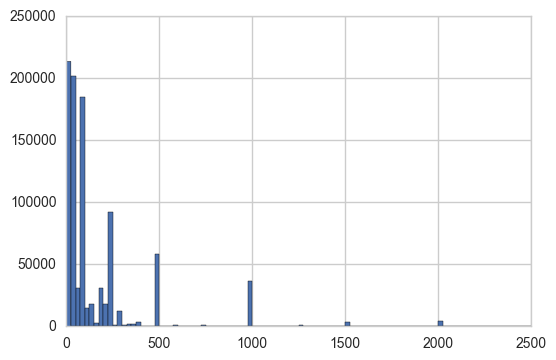

In [36]:
#create a series of the common donations limited to 2500
com_don = top_donor[top_donor<2500]

# set a higher number of bins to account for the non-round donations and check the histgram for spikes
com_don.hist(bins=100)

Looks like our intuition was right, since we spikes at the round numbers.

Let's dive deeper into the data and see if we can seperate donations by Party, in order to do this we'll have to figure out a way of creating a new 'Party' column. We can do this by starting with the candidates and their affliliation. Now let's go ahead and get a list of candidates

In [37]:
#grab the unique object from the candidate column
candidates = donor_df.cand_nm.unique()

candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

Let's go ahead and seperate Obama from the Republican Candidates by adding a Party Affiliation column. We can do this by using map along a dictionary of party affiliations. Lecture 36 has a review of this topic.

In [38]:
# Dictionary of party affliation

party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

# Now map the party with candidate
donor_df["Party"] = donor_df.cand_nm.map(party_map)

A quick note, we could have done this same operation manually using a for loop, however this operation would be much slower than using the map method.

In [39]:
"""
for i in range(0,len(donor_df)):
    if donor_df["cand_nm"][i] == "Obama,Barack":
        donor_df["Party"] = "Democrate"
    esle:
        donor_df["Party"] = "Republican"
"""

'\nfor i in range(0,len(donor_df)):\n    if donor_df["cand_nm"][i] == "Obama,Barack":\n        donor_df["Party"] = "Democrate"\n    esle:\n        donor_df["Party"] = "Republican"\n'

Let's look at our DataFrame and also make sure we clear refunds from the contribution amounts.


In [40]:
#clear the rufunds
donor_df = donor_df[donor_df.contb_receipt_amt >0]

#preview dataframe
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


Let's start by aggregating the data by candidate. We'll take a quick look a the total amounts received by each candidate. First we will look a the total number of donations and then at the total amount.

In [41]:
#Groupby candidate and then display the total number of peole who are donated

donor_df.groupby("cand_nm")["contb_receipt_amt"].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

Clearly Obama is the front-runner in number of people donating, which makes sense, since he is not competeing with any other democratic nominees. Let's take a look at the total dollar amounts.


In [42]:
#Groupby candidate and then display the total amount donated
donor_df.groupby("cand_nm")["contb_receipt_amt"].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

This isn't super readable, and an important aspect of data science is to clearly present information. Let's go ahead and just print out these values in a clean for loop.

In [43]:
#start by setting the groupby as an object
cand_amount = donor_df.groupby("cand_nm")["contb_receipt_amt"].sum()

# our index tracer
i=0

for don in cand_amount:
    print ("The candidate %s raised %.0f dollars" %(cand_amount.index[i], don))
    print ("\n")
    i += 1

The candidate Bachmann, Michelle raised 2711439 dollars


The candidate Cain, Herman raised 7101082 dollars


The candidate Gingrich, Newt raised 12832770 dollars


The candidate Huntsman, Jon raised 3330373 dollars


The candidate Johnson, Gary Earl raised 566962 dollars


The candidate McCotter, Thaddeus G raised 39030 dollars


The candidate Obama, Barack raised 135877427 dollars


The candidate Paul, Ron raised 21009620 dollars


The candidate Pawlenty, Timothy raised 6004819 dollars


The candidate Perry, Rick raised 20305754 dollars


The candidate Roemer, Charles E. 'Buddy' III raised 373010 dollars


The candidate Romney, Mitt raised 88335908 dollars


The candidate Santorum, Rick raised 11043159 dollars




This is okay, but its hard to do a quick comparison just by reading this information. How about just a quick graphic presentation?

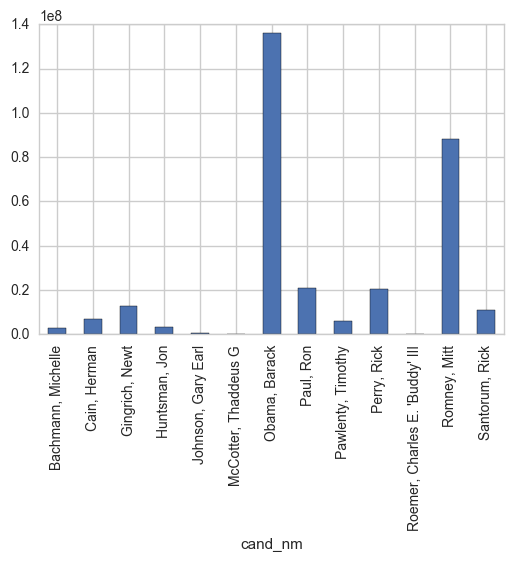

In [44]:
#plot out total donation amounts

cand_amount.plot(kind="bar")

Now the comparison is very easy to see. As we saw berfore, clearly Obama is the front-runner in donation amounts, which makes sense, since he is not competeing with any other democratic nominees. How about we just compare Democrat versus Republican donations?

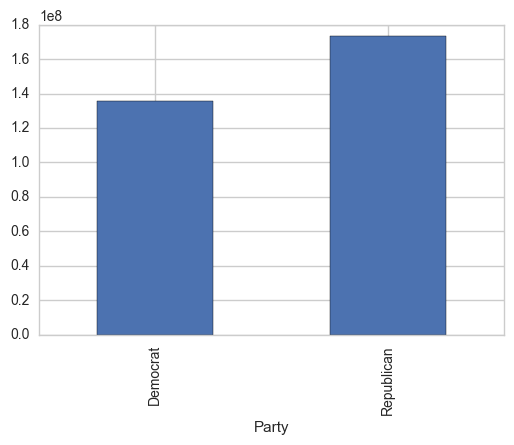

In [45]:
#groupby party and then count donation

donor_df.groupby("Party")["contb_receipt_amt"].sum().plot(kind="bar")

Looks like Obama couldn't compete against all the republicans, but he certainly has the advantage of their funding being splintered across multiple candidates.

Finally to start closing out the project, let's look at donations and who they came from (as far as occupation is concerned). We will start by grabing the occupation information from the dono_df DataFrame and then using pivot_table to make the index defined by the various occupations and then have the columns defined by the Party (Republican or Democrat). FInally we'll also pass an aggregation function in the pivot table, in this case a simple sum function will add up all the comntributions by anyone with the same profession.

In [46]:
#use a pivot table to extract and organize the data by the donor occupation

occupation_df = donor_df.pivot_table("contb_receipt_amt",
                                    index="contbr_occupation",
                                    columns="Party",
                                    aggfunc="sum")

In [47]:
occupation_df

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
'MIS MANAGER,NaN,177.60
(PART-TIME) SALES CONSULTANT & WRITER,NaN,285.00
(RETIRED),NaN,250.00
-,5000.0,2114.80


In [48]:
occupation_df.shape

(45067, 2)

Wow! This is probably far too large to display effectively with a small, static visualization. What we should do is have a cut-off for total contribution amounts. Afterall, small donations of 20 dollars by one type of occupation won't give us too much insight. So let's set our cut off at 1 million dollars.

In [49]:
#set a cut off point at 1 million dollor of sum contribution
# the numpy mehtod of .sum(1) here means only sum up 1 element at a time
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]

In [50]:
occupation_df

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
BANKER,224084.40,1.259469e+06
BUSINESS OWNER,449979.30,1.323342e+06
C.E.O.,1690.00,2.592983e+06
CEO,2073284.79,1.618057e+06
CHAIRMAN,496547.00,1.296093e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06


In [51]:
occupation_df.shape

(31, 2)

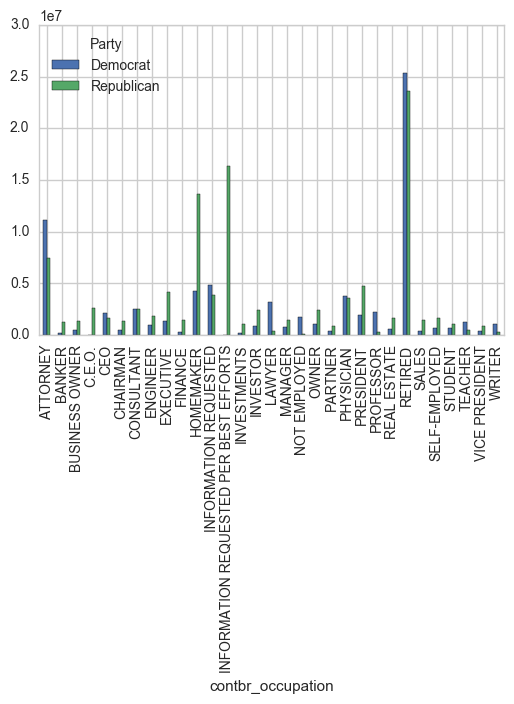

In [52]:
occupation_df.plot(kind="bar")

This is a bit hard to read, so let's use kind = 'barh' (horizontal) to set the ocucpation on the correct axis.

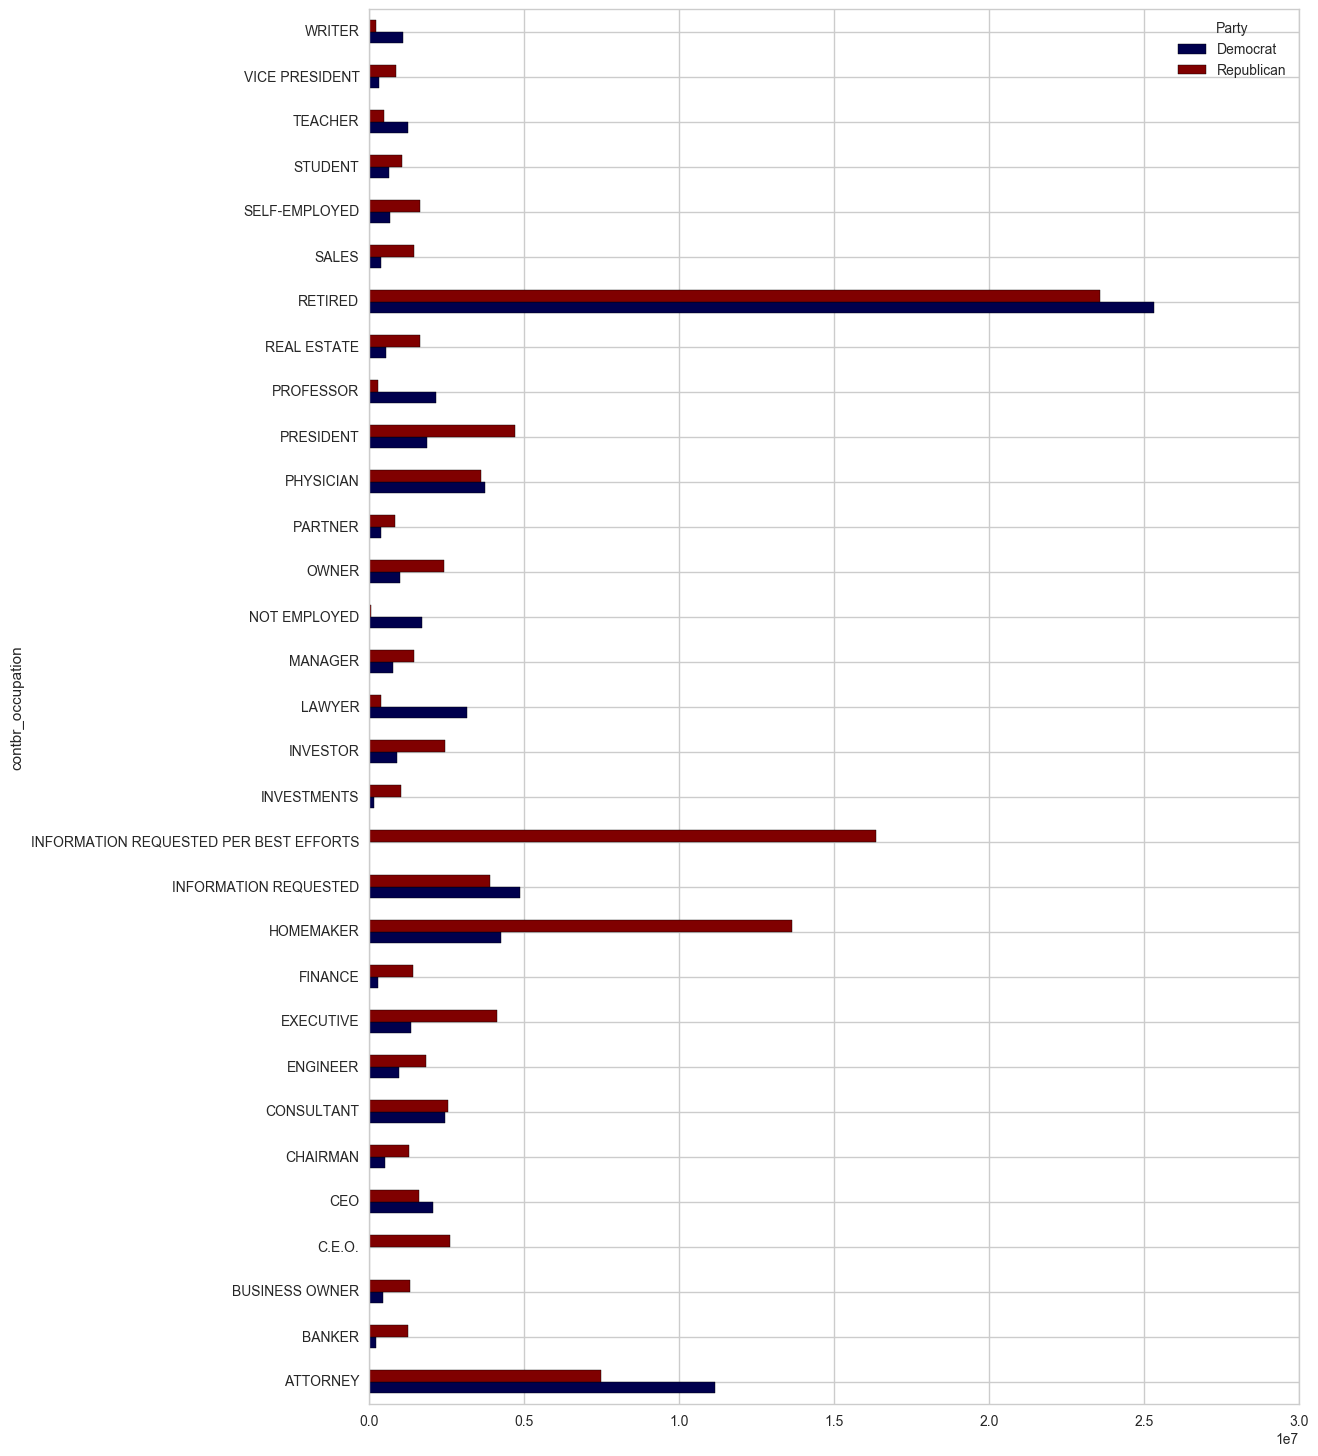

In [53]:
#horizontal plot, use a convenient color map

occupation_df.plot(kind="barh",figsize=(12,18),cmap="seismic")

Looks like there are some occupations that are either mislabeled or aren't really occupations. Let's get rid of: Information Requested occupations and let's combine CEO and C.E.O.

In [54]:
#drop the unavailable occupations
occupation_df.drop(["INFORMATION REQUESTED PER BEST EFFORTS","INFORMATION REQUESTED"],axis=0, inplace=True)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [55]:
# set new ceo row as sum of the current two
occupation_df.loc["CEO"] = occupation_df.loc["CEO"] + occupation_df.loc["C.E.O."]

#drop CEO
occupation_df.drop("C.E.O.", inplace=True)

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [56]:
occupation_df

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
BANKER,224084.40,1.259469e+06
BUSINESS OWNER,449979.30,1.323342e+06
CEO,2074974.79,4.211041e+06
CHAIRMAN,496547.00,1.296093e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
FINANCE,296031.40,1.402515e+06


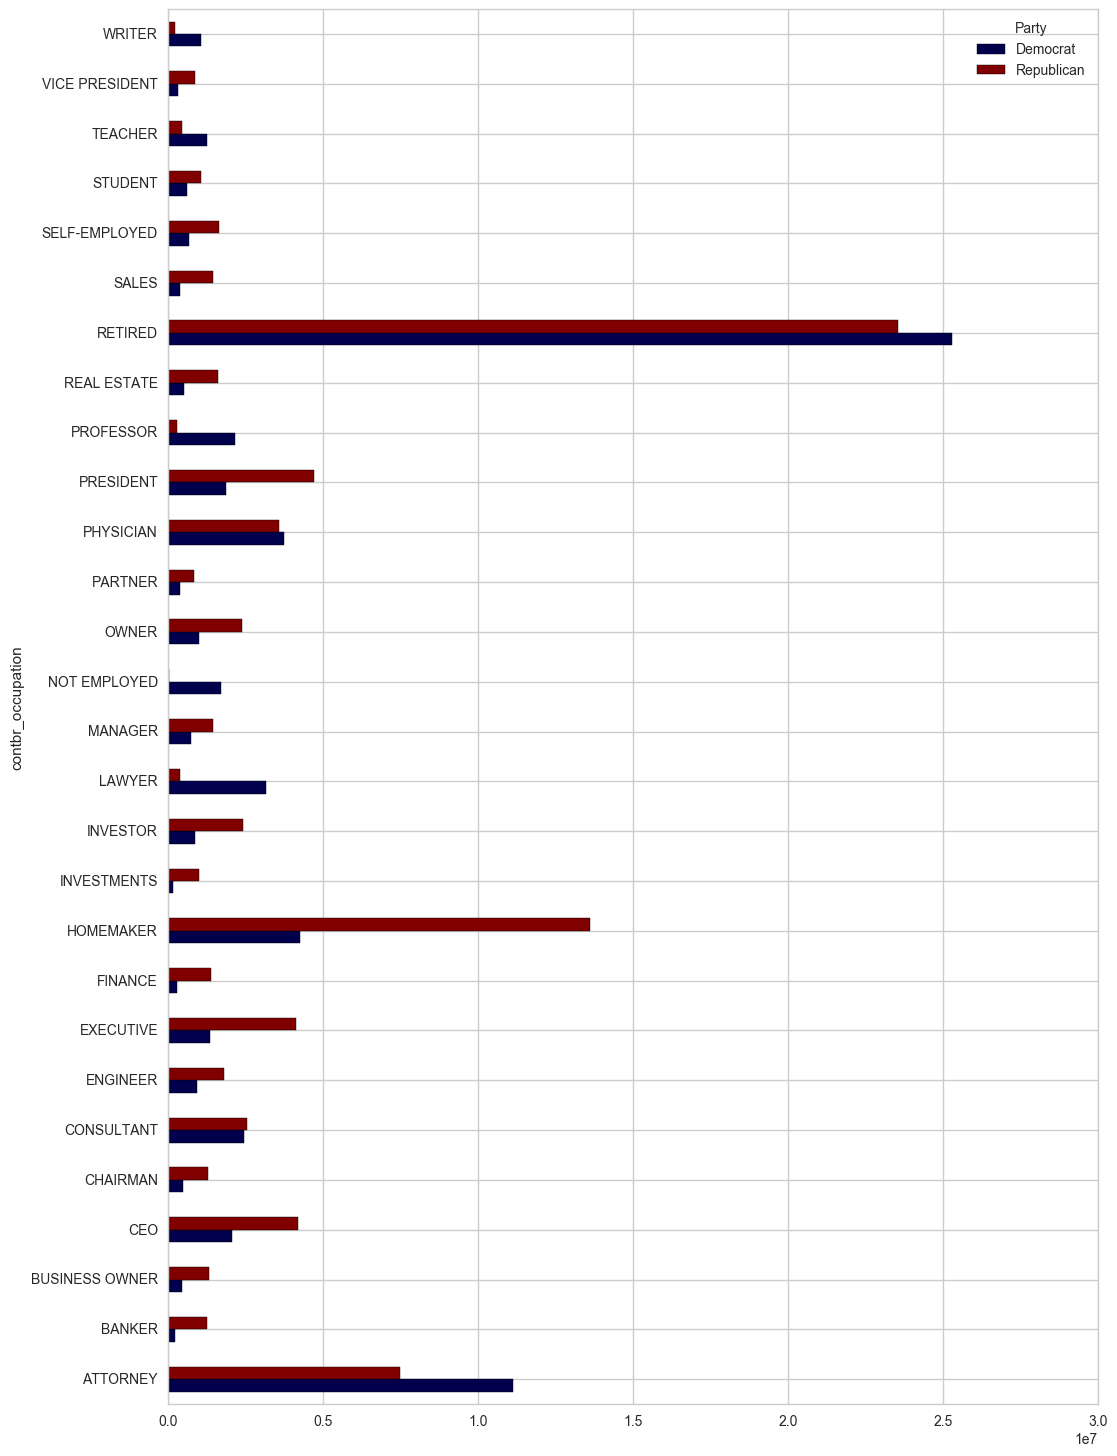

In [57]:
occupation_df.plot(kind="barh", figsize=(12,18),cmap="seismic")

Awesome! Looks like CEOs are a little more conservative leaning, this may be due to the tax philosphies of each party during the election.